In [2]:
import get_db_data as gdd
import analyze_signal as anaz
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
reload(gdd);
reload(anaz);
from sqlalchemy.engine.result import RowProxy
from numpy.linalg import norm
import seaborn as sns
from scipy.stats import zscore

In [3]:
gdd.group_signal_sql

In [4]:
data = gdd.get_db_data()
pars = data.get_participants(True)

In [5]:
cohes ={a[1]: str(a[2])[:4] for a in pars}

In [16]:
pars

[(1001, 101, Decimal('4.25000')),
 (1001, 102, Decimal('5.00000')),
 (1001, 103, Decimal('5.25000')),
 (1003, 108, Decimal('4.00000')),
 (1003, 109, Decimal('1.50000')),
 (1004, 110, Decimal('3.50000')),
 (1004, 111, Decimal('2.75000')),
 (1004, 112, Decimal('3.75000')),
 (1006, 116, Decimal('4.00000')),
 (1006, 117, Decimal('4.75000')),
 (1006, 118, Decimal('3.25000')),
 (1007, 119, Decimal('3.25000')),
 (1007, 120, Decimal('5.00000')),
 (1007, 121, Decimal('4.75000')),
 (1008, 122, Decimal('6.00000')),
 (1008, 123, Decimal('6.00000')),
 (1008, 124, Decimal('4.75000')),
 (1009, 125, Decimal('5.50000')),
 (1009, 126, Decimal('5.00000')),
 (1009, 127, Decimal('4.00000')),
 (1010, 128, Decimal('4.75000')),
 (1010, 129, Decimal('3.75000')),
 (1010, 130, Decimal('3.25000')),
 (1011, 131, Decimal('5.00000')),
 (1011, 132, Decimal('4.25000')),
 (1011, 133, Decimal('6.00000')),
 (1012, 134, Decimal('1.00000')),
 (1012, 135, Decimal('2.00000')),
 (1012, 136, Decimal('4.25000')),
 (1013, 137, D

In [33]:
pars_tuples={}
for g, p, _ in pars:
    pars_tuples[g] = pars_tuples.get(g,[])  + [p]
pars_tuples

{1001: [101, 102, 103],
 1003: [108, 109],
 1004: [110, 111, 112],
 1006: [116, 117, 118],
 1007: [119, 120, 121],
 1008: [122, 123, 124],
 1009: [125, 126, 127],
 1010: [128, 129, 130],
 1011: [131, 132, 133],
 1012: [134, 135, 136],
 1013: [137, 138, 139],
 1014: [140, 141, 142],
 1015: [144, 145],
 1016: [146, 147, 148],
 1017: [149, 151],
 1019: [155, 156, 157],
 1020: [158, 159, 160],
 1022: [164, 165, 166],
 1023: [167, 168, 169],
 1024: [170, 171, 172],
 1025: [173, 174, 175],
 1026: [176, 177, 178],
 1027: [179, 180, 181],
 1028: [182, 183],
 1029: [185, 186, 187],
 1030: [188, 189, 190],
 1031: [191, 192, 193],
 1032: [194, 195, 196],
 1033: [200, 201, 202],
 1034: [203, 204, 205],
 1035: [206, 207, 208],
 1036: [209, 210, 211],
 1037: [212, 213, 214],
 1038: [215, 216, 217],
 1039: [218, 219, 220],
 1040: [221, 222, 223],
 1041: [224, 225, 226],
 1042: [227, 228, 229],
 1043: [230, 231, 232],
 1044: [233, 234, 235],
 1045: [236, 237, 238],
 1046: [239, 240, 241],
 1047: [242,

In [68]:
def plot_interaction(par_list,ax, cohesions, z=True):
    par_ids = [];
    for j, (par_id, par_data) in enumerate(data.get_signal_by_series_type_and_interp_type(par_list,2,3)):
        par_ids.append(str(par_id))
        y = zscore(par_data[:,1]) +j*3 if z else par_data[:,1]
        ax.plot(par_data[:,0], y)
        i = int(np.random.rand()*200)
        #ax.text(par_data[i,0],y[i],str(cohesions.get(par_id,"NA")))
    ax.legend(par_ids)


In [1]:
[cohesions[t] for t in (125,126,127)]

NameError: name 'cohesions' is not defined

In [69]:
k=4; s=0
ptk = list(pars_tuples.keys())


0


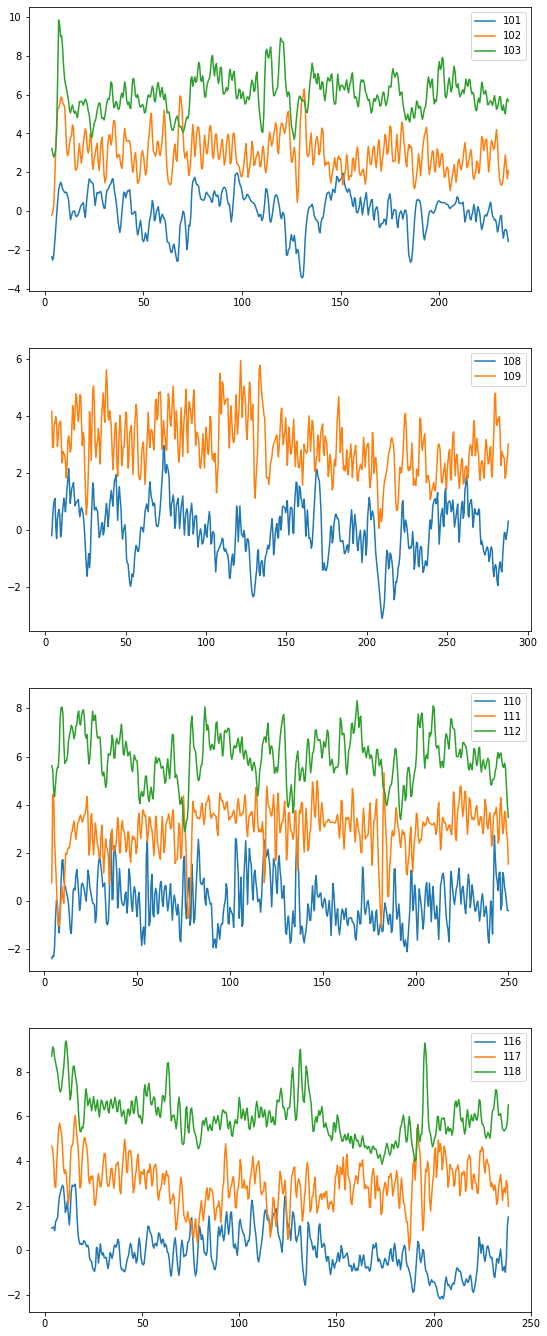

In [70]:
print(s)
ax=plt.subplots(k,figsize=(9,6*k))
for i,g in enumerate(ptk[s:]):
    plot_interaction(pars_tuples[g],ax[1][i],cohes)
    if i == k-1:
        break
s = s + k


4


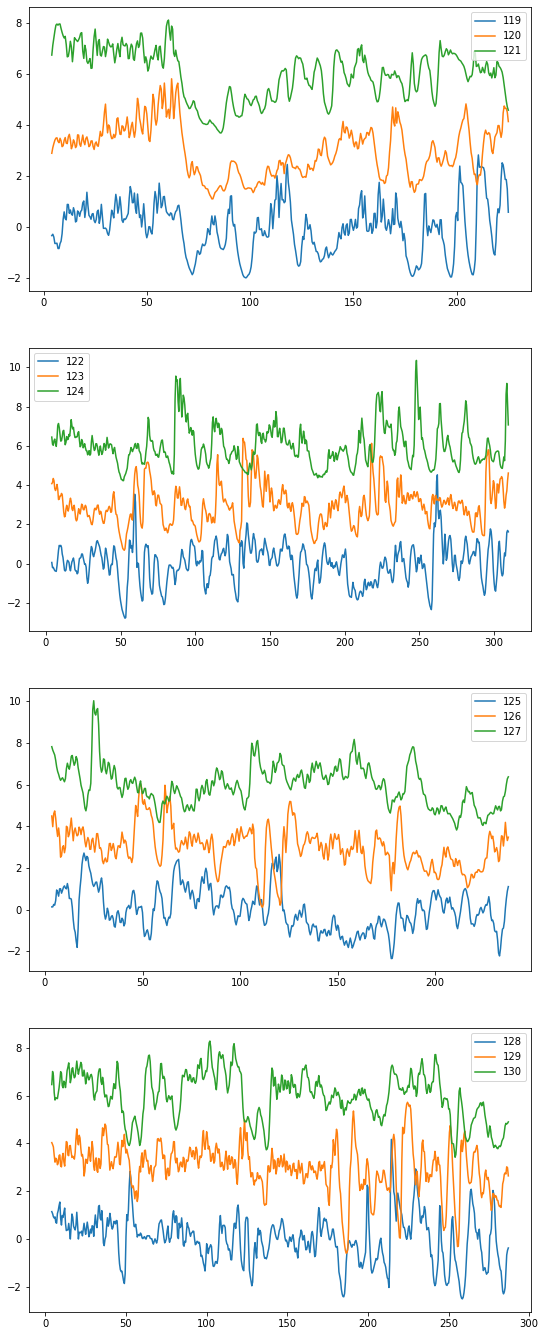

In [71]:
s=4
print(s)
ax=plt.subplots(k,figsize=(9,6*k))
for i,g in enumerate(ptk[s:]):
    plot_interaction(pars_tuples[g],ax[1][i],cohes)
    if i == k-1:
        break
s = s + k


8


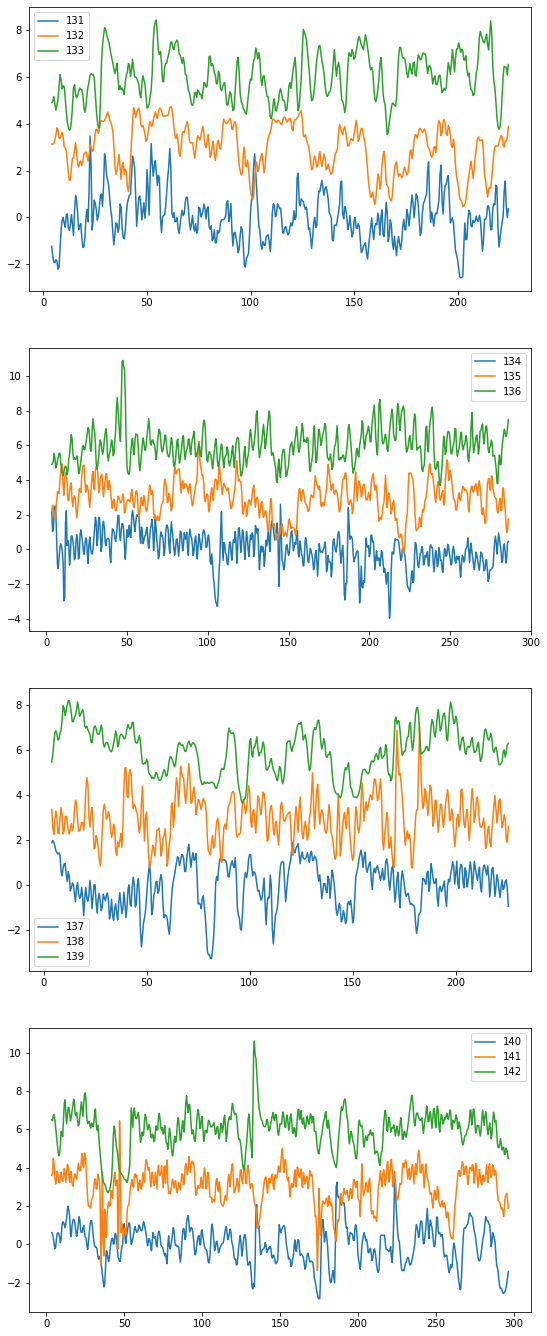

In [72]:
print(s)
ax=plt.subplots(k,figsize=(9,6*k))
for i,g in enumerate(ptk[s:]):
    plot_interaction(pars_tuples[g],ax[1][i],cohes)
    if i == k-1:
        break
s = s + k

12


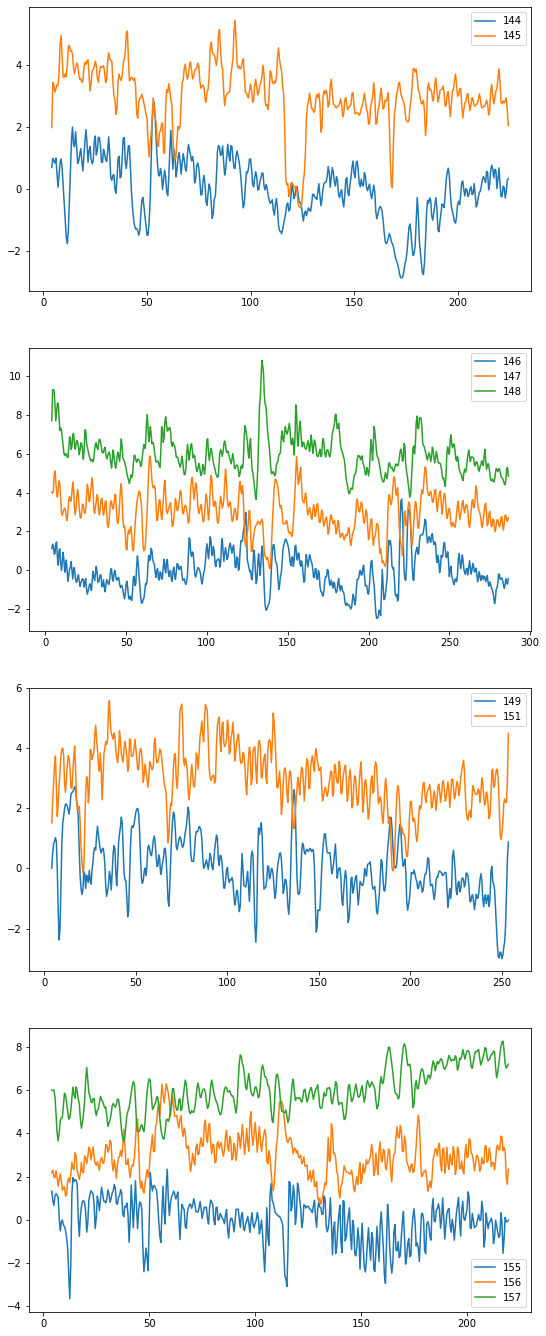

In [73]:
print(s)
ax=plt.subplots(k,figsize=(9,6*k))
for i,g in enumerate(ptk[s:]):
    plot_interaction(pars_tuples[g],ax[1][i],cohes)
    if i == k-1:
        break
s = s + k

### Interesting points so far
* Events of dramatic change of HR. High-freqeuncy change
* Time distortion with a limited window can help boost correlation
* interesting to see the baselines and the freestyle
* Take a high-pass filter (e.g. use Kalman filtering) to remove slow variations in IBI, focus on correlations in fast-varying components 

In [11]:
len(ax)

2

In [74]:
type(ptk)

list

In [76]:
len(ptk)

47

In [79]:
type(ptk[2])

int

In [88]:
cohes[119]

'3.25'

In [83]:
list(cohes.keys())

[101,
 102,
 103,
 108,
 109,
 110,
 111,
 112,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 144,
 145,
 146,
 147,
 148,
 149,
 151,
 155,
 156,
 157,
 158,
 159,
 160,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 250,
 251,
 252,
 253,
 254,
 255,
 256]

In [94]:
d = data.get_signal_by_series_type_and_interp_type([119],2,3)
a = next(d)

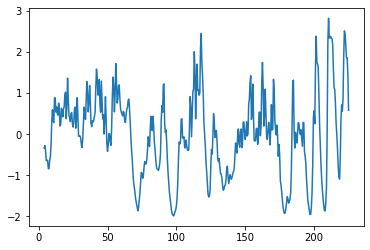

In [98]:
y = zscore(a[1][:,1])
plt.plot(a[1][:,0],y )

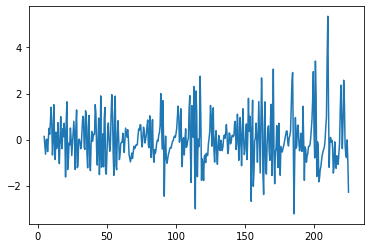

In [104]:
plt.plot(a[1][1:,0],zscore(np.diff(y)))

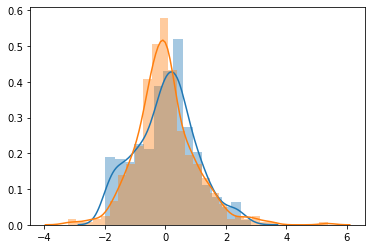

In [110]:
sns.distplot(y)

sns.distplot(zscore(np.diff(y)))


In [92]:
next(d)

StopIteration: 